<a href="https://colab.research.google.com/github/ayushkapoor391/Maverick/blob/main/Los_Angeles_Crime_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
file_path = '/content/Crime_Data.csv'
crime_data = pd.read_csv(file_path)

# Display the first few rows
print(crime_data.head())

       DR_NO                DATE OCC  TIME OCC   AREA NAME      LAT       LON  \
0  190326475  03/01/2020 12:00:00 AM      2130    Wilshire  34.0375 -118.3506   
1  200106753  02/08/2020 12:00:00 AM      1800     Central  34.0444 -118.2628   
2  200320258  11/04/2020 12:00:00 AM      1700   Southwest  34.0210 -118.3002   
3  200907217  03/10/2020 12:00:00 AM      2037    Van Nuys  34.1576 -118.4387   
4  200412582  09/09/2020 12:00:00 AM       630  Hollenbeck  34.0820 -118.2130   

   Vict Age Vict Sex Vict Descent   Status Desc  
0         0        M            O  Adult Arrest  
1        47        M            O   Invest Cont  
2        19        X            X   Invest Cont  
3        19        M            O   Invest Cont  
4         0      NaN          NaN   Invest Cont  


In [3]:
print(crime_data.columns.tolist())

['DR_NO', 'DATE OCC', 'TIME OCC', 'AREA NAME', 'LAT', 'LON', 'Vict Age', 'Vict Sex', 'Vict Descent', 'Status Desc']


In [4]:
#Normalize Column Names
crime_data.columns = crime_data.columns.str.strip().str.lower().str.replace(' ', '_')


In [5]:
print(crime_data.columns.tolist())

['dr_no', 'date_occ', 'time_occ', 'area_name', 'lat', 'lon', 'vict_age', 'vict_sex', 'vict_descent', 'status_desc']


In [6]:
# Format TIME OCC as a proper time object
crime_data['time_occ'] = crime_data['time_occ'].apply(lambda x: f'{int(x):04d}')
crime_data['time_occ'] = pd.to_datetime(crime_data['time_occ'], format='%H%M', errors='coerce').dt.time

In [7]:
#Convert 'date_occ' to datetime format
crime_data['date_occ'] = pd.to_datetime(crime_data['date_occ'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

In [8]:
# Handle Missing Data
# Replace missing values in 'vict_sex' and 'vict_descent' with "Unknown"
crime_data['vict_sex'] = crime_data['vict_sex'].fillna('Unknown')
crime_data['vict_descent'] = crime_data['vict_descent'].fillna('Unknown')

In [9]:
# Drop rows with missing or invalid latitude/longitude
crime_data['lat'] = crime_data['lat'].replace(0, np.nan)
crime_data['lon'] = crime_data['lon'].replace(0, np.nan)
crime_data.dropna(subset=['lat', 'lon'], inplace=True)

In [10]:
print(crime_data.head())

       dr_no   date_occ  time_occ   area_name      lat       lon  vict_age  \
0  190326475 2020-03-01  21:30:00    Wilshire  34.0375 -118.3506         0   
1  200106753 2020-02-08  18:00:00     Central  34.0444 -118.2628        47   
2  200320258 2020-11-04  17:00:00   Southwest  34.0210 -118.3002        19   
3  200907217 2020-03-10  20:37:00    Van Nuys  34.1576 -118.4387        19   
4  200412582 2020-09-09  06:30:00  Hollenbeck  34.0820 -118.2130         0   

  vict_sex vict_descent   status_desc  
0        M            O  Adult Arrest  
1        M            O   Invest Cont  
2        X            X   Invest Cont  
3        M            O   Invest Cont  
4  Unknown      Unknown   Invest Cont  


In [11]:
# Extract year, month, day, weekday, and hour
crime_data['year'] = crime_data['date_occ'].dt.year
crime_data['month'] = crime_data['date_occ'].dt.month
crime_data['weekday'] = crime_data['date_occ'].dt.day_name()
crime_data['hour'] = pd.to_datetime(crime_data['time_occ'], format='%H:%M:%S', errors='coerce').dt.hour



In [12]:
print(crime_data.head())

       dr_no   date_occ  time_occ   area_name      lat       lon  vict_age  \
0  190326475 2020-03-01  21:30:00    Wilshire  34.0375 -118.3506         0   
1  200106753 2020-02-08  18:00:00     Central  34.0444 -118.2628        47   
2  200320258 2020-11-04  17:00:00   Southwest  34.0210 -118.3002        19   
3  200907217 2020-03-10  20:37:00    Van Nuys  34.1576 -118.4387        19   
4  200412582 2020-09-09  06:30:00  Hollenbeck  34.0820 -118.2130         0   

  vict_sex vict_descent   status_desc  year  month    weekday  hour  
0        M            O  Adult Arrest  2020      3     Sunday    21  
1        M            O   Invest Cont  2020      2   Saturday    18  
2        X            X   Invest Cont  2020     11  Wednesday    17  
3        M            O   Invest Cont  2020      3    Tuesday    20  
4  Unknown      Unknown   Invest Cont  2020      9  Wednesday     6  


In [13]:
#Export the New CSV for Visualization
crime_data.to_csv('Crime_Data_Visualization.csv', index=False)

<ipython-input-15-15f73bd864c8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=area_counts.index, y=area_counts.values, palette="viridis")


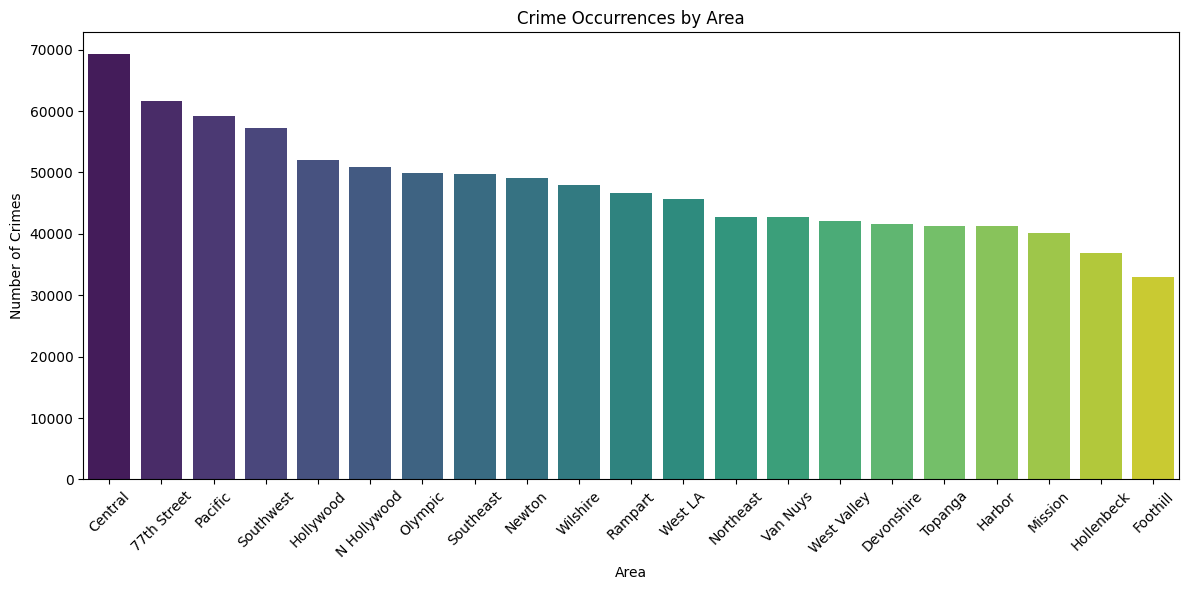

In [15]:
# Visualization 1: Crime Occurrences by Area (Bar Chart)
plt.figure(figsize=(12, 6))
area_counts = crime_data['area_name'].value_counts()
sns.barplot(x=area_counts.index, y=area_counts.values, palette="viridis")
plt.title("Crime Occurrences by Area")
plt.xlabel("Area")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-17-1c5f20b1f483>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=weekday_counts.index, x=weekday_counts.values, palette="coolwarm")


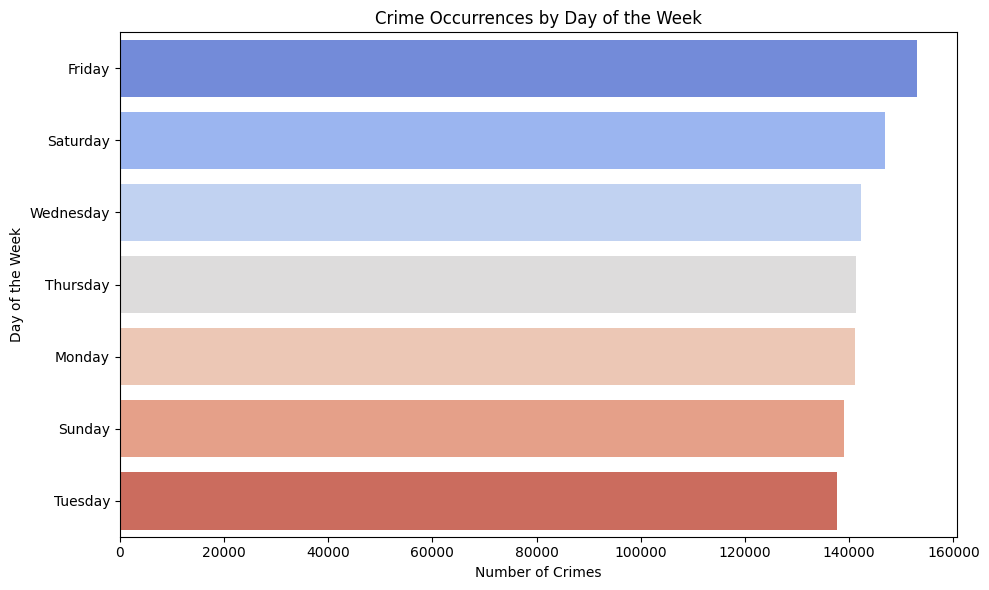

In [17]:
# Visualization 2: Crime Occurrences by Day of the Week (Horizontal Bar Chart)
plt.figure(figsize=(10, 6))
weekday_counts = crime_data['weekday'].value_counts()
sns.barplot(y=weekday_counts.index, x=weekday_counts.values, palette="coolwarm")
plt.title("Crime Occurrences by Day of the Week")
plt.xlabel("Number of Crimes")
plt.ylabel("Day of the Week")
plt.tight_layout()
plt.show()

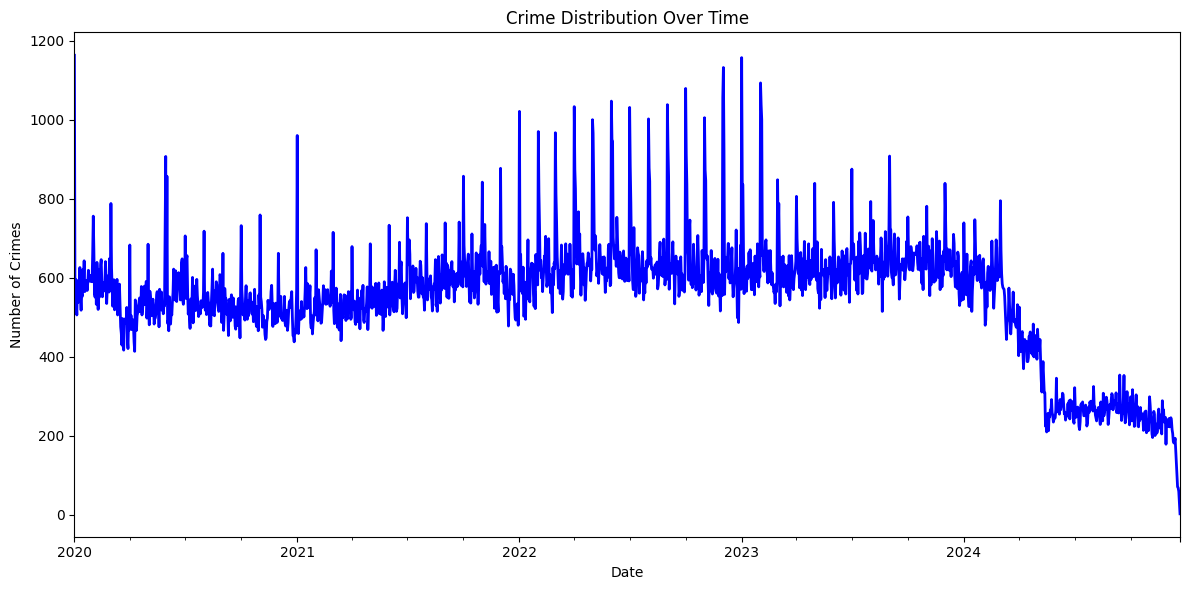

In [19]:
# Visualization 3: Crime Distribution Over Time (Line Chart)
plt.figure(figsize=(12, 6))
crime_data['date_occ'].value_counts().sort_index().plot(kind='line', linewidth=2, color='blue')
plt.title("Crime Distribution Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Crimes")
plt.tight_layout()
plt.show()

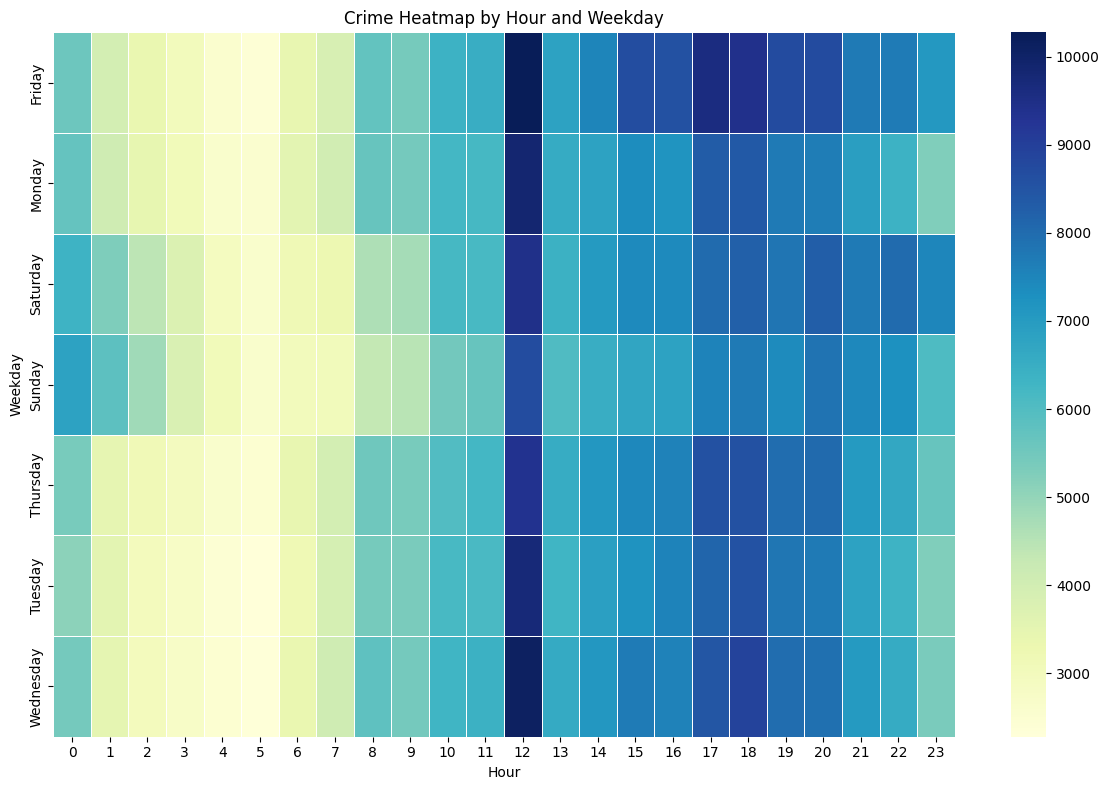

In [21]:
# Visualization 4: Crime Heatmap by Hour and Weekday (Heatmap)
plt.figure(figsize=(12, 8))
heatmap_data = crime_data.pivot_table(index='weekday', columns='hour', values='dr_no', aggfunc='count').fillna(0)
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.5, annot=False)
plt.title("Crime Heatmap by Hour and Weekday")
plt.xlabel("Hour")
plt.ylabel("Weekday")
plt.tight_layout()
plt.show()

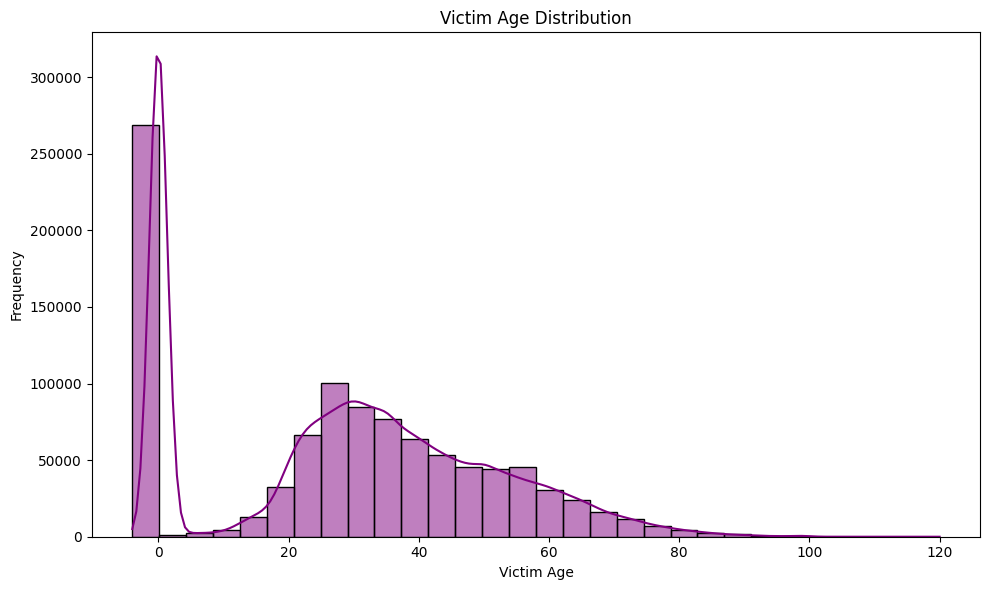

In [23]:
# Visualization 5: Victim Age Distribution (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(crime_data['vict_age'], bins=30, kde=True, color='purple')
plt.title("Victim Age Distribution")
plt.xlabel("Victim Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

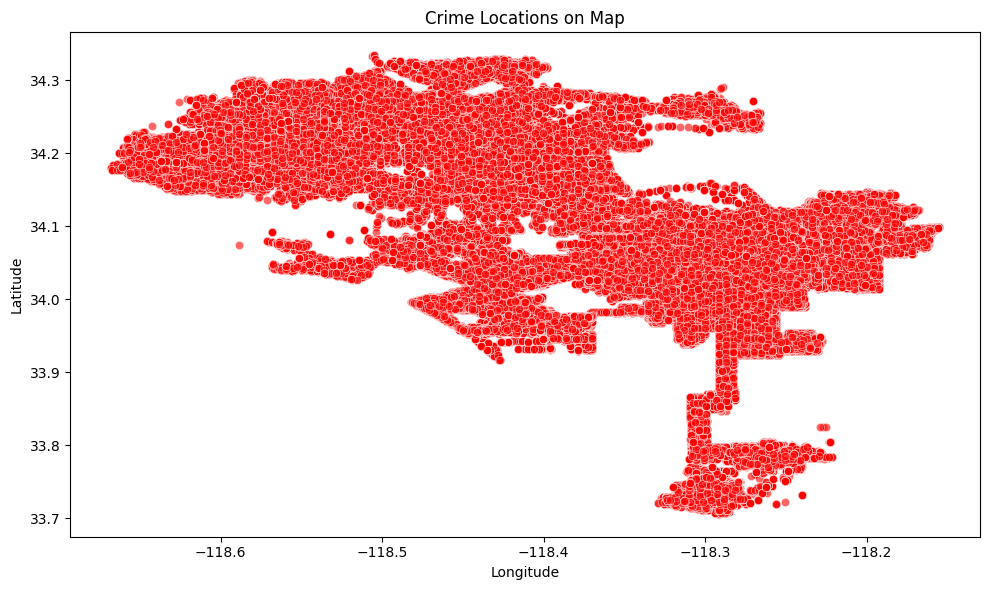

In [26]:
# Visualization 6: Crime Locations on a Map (Scatter Plot with Latitude and Longitude)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=crime_data['lon'], y=crime_data['lat'], alpha=0.6, color='red')
plt.title("Crime Locations on Map")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()

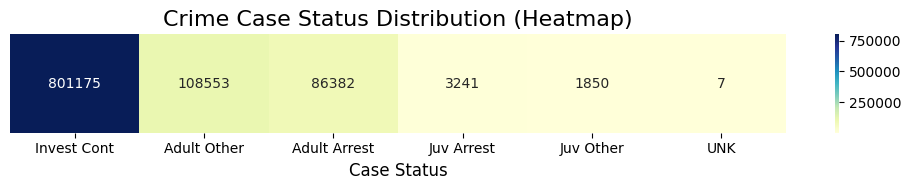

In [29]:
#Visualizing Crime Case Status Distribution Using a Heatmap
plt.figure(figsize=(10, 2))
status_counts = crime_data['status_desc'].value_counts()

# Create a heatmap
sns.heatmap([status_counts.values], annot=True, fmt="d", cmap="YlGnBu", xticklabels=status_counts.index)
plt.title('Crime Case Status Distribution (Heatmap)', fontsize=16)
plt.xlabel('Case Status', fontsize=12)
plt.yticks([], [])  # Hide y-axis
plt.tight_layout()
plt.show()

<ipython-input-30-cd0a8950c65e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status_desc', y='vict_age', data=crime_data, palette="Set3")


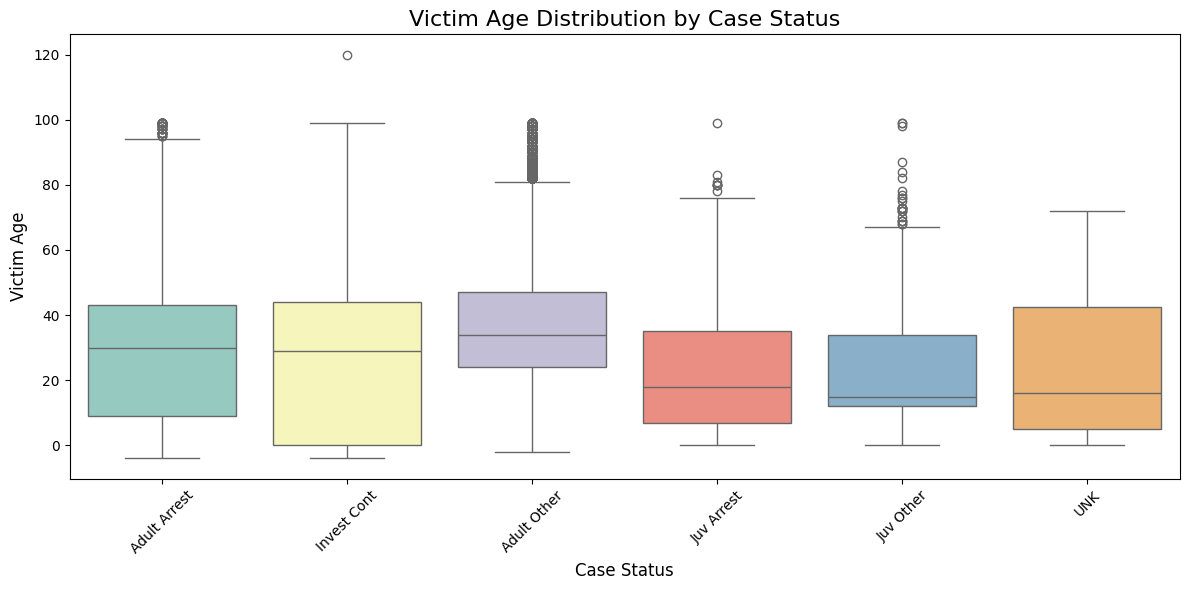

In [30]:
#Analyzing Victim Age Distribution Across Different Case Statuses Using a Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='status_desc', y='vict_age', data=crime_data, palette="Set3")
plt.title('Victim Age Distribution by Case Status', fontsize=16)
plt.xlabel('Case Status', fontsize=12)
plt.ylabel('Victim Age', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()